# Aakash-ME16B001
***
# 1-D Transient Heat Conduction
<img src="a3.png">
Given data -  Thickness,$L=0.24m$; Area,$A=8m^2$; Conductivity,$k=0.6W/m-k$; Density,$\rho=3000Kg/m^3$; Specific heat,$C = 0.2KJ/Kg-K$
At $t=0$ $T(t=0)=25^{\circ}C$ 
Immediately after t = 0 $T(x=0)=100^{\circ}C, T(x=L)=75^{\circ}C$

## Governing Equation

$$\frac{\partial^2 T}{\partial x^2} = \frac{1}{\alpha}\frac{\partial T}{\partial t}$$
where, $$T \text{ is the temperature in }^{\circ}C$$ 
$$x \text{ is the distance in meters}$$ 
$$t \text{ is the time in seconds}$$ 
$\alpha$ is the thermal diffusivity $$\alpha = \frac{\kappa}{\rho C} $$

## Derivation of the Governing equation
Consider the element of width $\delta x$ as shown in the digram
$$\text{change of heat energy from the segment in time }\Delta T = \text{heat in from left boundary} + \text{heat input from right boundary}$$
$$ C\times \rho A \Delta x \left [T(x,t+\Delta t)-T(x,t)\right] = \Delta t \left (-kA\frac{dT}{dx}\right )_x - \Delta t \left (-kA\frac{dT}{dx}\right )_{x+\Delta x}$$
$$\frac{T(x,t+\Delta t)-T(x,t)}{\Delta t}=\frac{k}{\rho C}  
     \frac{\left(\frac{dT}{dx}\right )_{x+\Delta x}-\left(\frac{dT}{dx}\right )_{x}}{\Delta x}$$
In the limit $\Delta x \to 0$ and $\Delta t \to 0$
$$ \frac{\partial T}{\partial t} = \alpha\frac{\partial^2 T}{\partial x^2} $$

## Discretization
1. Explicit Scheme
$$\frac{T_i^{n+1}-T_i^{n}}{\Delta t} = \alpha \left[ \frac{T_{i+1}^{n}-2T_i^{n}+T_{i-1}^{n}}{\Delta x^2}  \right]$$
Using $r=\frac{\alpha s}{h^2}$

$$ T_i^{n+1}-T_i^{n} = r \left[ T_{i+1}^{n}-2T_i^{n}+T_{i-1}^{n}\right]$$
2. Implicit Scheme
$$\frac{T_i^{n+1}-T_i^{n}}{\Delta t} = \alpha \left[ \frac{T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}}{\Delta x^2}  \right]$$
$$T_i^{n+1}-T_i^{n} = r \left[ T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}\right]$$
3. Crank Nicholson Scheme
$$\frac{T_i^{n+1}-T_i^{n}}{\Delta t} = \alpha \left[ \frac{T_{i+1}^{n+1}+T_{i+1}^{n}-2T_i^{n+1}-2T_i^{n}+T_{i-1}^{n+1}+T_{i-1}^{n}}{2\Delta x^2}  \right]$$
$$T_i^{n+1}-T_i^{n} = \frac{r}{2} \left[ T_{i+1}^{n+1}+T_{i+1}^{n}-2T_i^{n+1}-2T_i^{n}+T_{i-1}^{n+1}+T_{i-1}^{n}\right]$$


## Program

For explicit scheme
$$ T_i^{n+1} = rT_{i-1}^{n} +(1-2r)T_i^{n}+r  T_{i+1}^{n}$$
For n=0
$$T_i^0=25 \text{ for all } 1\leq i \leq p$$
$$ T_i^{1} = rT_{i-1}^{0} +(1-2r)T_i^{0}+r  T_{i+1}^{0}$$
  1. For i=0
  $$ T_0^{1} = rT_{-1}^{0} +(1-2r)T_0^{0}+r  T_{1}^{0}$$
  Assuming that temperature at node -1 is equal to that of node 0 in the program.
  2. For i=1
  $$ T_1^{1} = rT_{0}^{0} +(1-2r)T_1^{0}+r  T_{2}^{0}$$
  3. For i=2
  $$ T_2^{1} = rT_{1}^{0} +(1-2r)T_2^{0}+r  T_{3}^{0}$$
  
  
For n=1
$$ T_i^{2} = rT_{i-1}^{1} +(1-2r)T_i^{1}+r  T_{i+1}^{1}$$
  1. For i=0
  $$ T_0^{2} = rT_{-1}^{1} +(1-2r)T_0^{1}+r  T_{1}^{1}$$
  2. For i=1
  $$ T_1^{2} = rT_{0}^{1} +(1-2r)T_1^{1}+r  T_{2}^{1}$$
  3. For i=2
  $$ T_2^{2} = rT_{1}^{1} +(1-2r)T_2^{1}+r  T_{3}^{1}$$






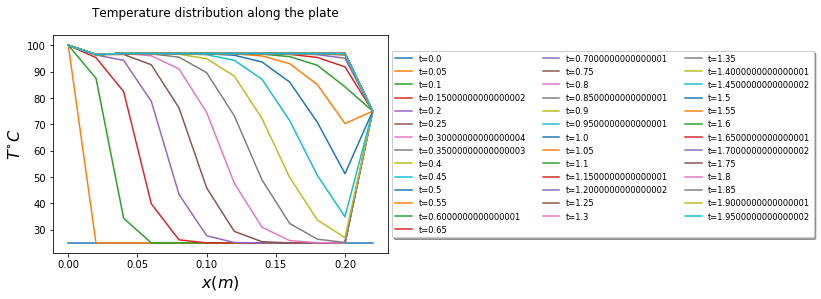

In [4]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from array import *
from scipy.sparse import *

#  (r,c) => (n,i) \\ (q,p)  || (time,space)
L=0.24
alpha=0.001
def Temp(scheme,tinter,s,h):
    T=[[]]
    q=tinter/s
    p=L/h
    r=(alpha*s)/(h*h)

    for i in range(int(p)):
        T[0].append(25)
    # explcit scheme
    if scheme==1:
        for n in range(1,int(q)):
            T.append([])
            for i in range(0,int(p-1)):
                if i==0:
                    # asssumption that temperature at node i=-1 is equal to left end
                    T[n].append( r*T[n-1][i] + (1-2*r)*T[n-1][i] + r*T[n-1][i+1] )
                if i==int(p-1):
                    # asssumption that temperature at node i=21 is equal to rightmost end
                    T[n].append(r*T[n-1][i-1] + (1-2*r)*T[n-1][i] + r*T[n-1][i] )
                else:
                    T[n].append(r*T[n-1][i-1] + (1-2*r)*T[n-1][i] + r*T[n-1][i+1] )
            # boundary conditions
            T[n][0]=100
            T[n][int(p-1)]=75
    # if scheme==2:
        # TODO: implemtnt implicit scheme
    # if scheme==3:
        # TODO: implemtnt CN scheme
    return(T)

#  inputs for calling the function (scheme,time interim,time step, space step)
method=1
tin=2
s=0.05
h=0.02
# print(Temp(method,tin,s,h))
A=Temp(method,tin,s,h)
l=[]
for i in range(int(L/h)):
    l.append(i*h)
for i in range(int(tin/s)):
    plt.plot(l,A[i],label="t="+str(i*s))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3, fancybox=True, shadow=True,fontsize='small')
plt.xlabel(r'$x (m)$', fontsize=16)
plt.ylabel(r'$ T^{\circ}C $', fontsize=16)
plt.suptitle('Temperature distribution along the plate')
plt.show()